<a href="https://colab.research.google.com/github/dlee1982/audit_accounting/blob/main/Basic_Benford_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

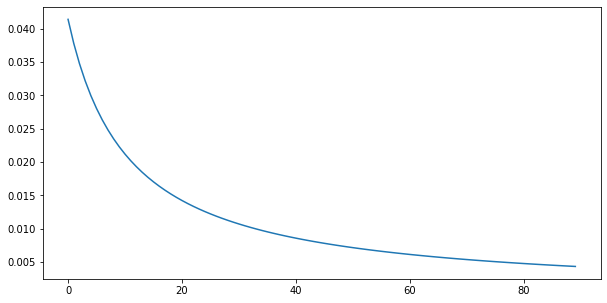

In [2]:
number_seq = [np.log10(1+(1/int(str(num1)+str(num2)))) 
              for num1 in range(1, 10) 
              for num2 in range(0, 10)]

fig, ax = plt.subplots(figsize=(10, 5))
_ = plt.plot(number_seq)

In [3]:
invoices = pd.read_csv('tblInvoicesPaid.csv')
invoices.head()

,ID,VendorNum,Date,InvNum,Amount
0,1,2001,1/1/2010,4242J10,25.19
1,2,2001,1/1/2010,7899J10,25.86
2,3,2001,1/1/2010,3830J10,26.57
3,4,2001,1/1/2010,9514J10,27.83
4,5,2001,1/1/2010,6296J10,28.09


In [4]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189470 entries, 0 to 189469
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         189470 non-null  int64 
 1   VendorNum  189470 non-null  int64 
 2   Date       189470 non-null  object
 3   InvNum     189470 non-null  object
 4   Amount     189470 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.2+ MB


In [5]:
invoices['Amount'] = (invoices['Amount']
                      .str.replace(',', '')
                      .astype('float')
                     )

In [6]:
two_digits = (invoices
              .query('Amount >= 10')
              .astype({'Amount':'string'})
              ['Amount']
              .str
              .split(".", expand=True)
              .rename(columns={0:'first_two'})
             )

In [7]:
two_digits = (two_digits['first_two']
              .apply(lambda x: x[:2])
             )

In [8]:
two_per = (two_digits
 .value_counts(normalize=True)
 .reset_index()
 .sort_values('index')
 .rename(columns={'index':'first_two', 
                  'first_two':'Percent'})
)

<BarContainer object of 90 artists>

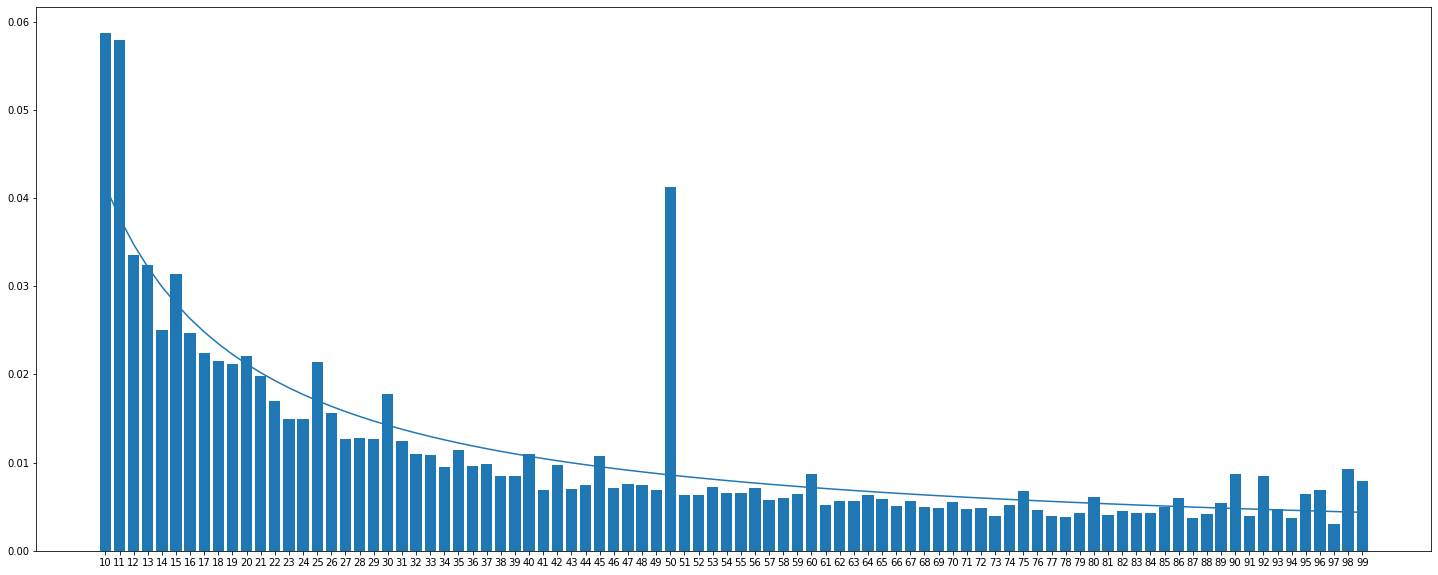

In [9]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(number_seq)
plt.bar(two_per['first_two'], two_per['Percent'])
# plt.savefig("output.jpg")

In [10]:
invoices['Amount'] = (invoices['Amount']
                      .astype('string')
                     )
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189470 entries, 0 to 189469
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         189470 non-null  int64 
 1   VendorNum  189470 non-null  int64 
 2   Date       189470 non-null  object
 3   InvNum     189470 non-null  object
 4   Amount     189470 non-null  string
dtypes: int64(2), object(2), string(1)
memory usage: 7.2+ MB


In [11]:
invoices['Fifty'] = (invoices['Amount']
                     .str
                     .split(".", expand=True)
                     .get(0)
                    )

In [12]:
invoices.head()

,ID,VendorNum,Date,InvNum,Amount,Fifty
0,1,2001,1/1/2010,4242J10,25.19,25
1,2,2001,1/1/2010,7899J10,25.86,25
2,3,2001,1/1/2010,3830J10,26.57,26
3,4,2001,1/1/2010,9514J10,27.83,27
4,5,2001,1/1/2010,6296J10,28.09,28


In [13]:
invoices['two_digits'] = (invoices['Fifty']
                          .apply(lambda x: "Yes" 
                                 if x[:2] == "50" else "No")
                         )

In [14]:
(invoices
 .query('two_digits == "Yes"')
 .drop(['Fifty', 'two_digits'], axis=1)
 .sample(25)
)

,ID,VendorNum,Date,InvNum,Amount
146575,146576,9227,1/15/2010,488937,50.0
126625,126626,6384,9/22/2010,623412,50.0
107309,107310,5727,12/23/2010,FL3543544,509.32
143802,143803,8062,12/17/2010,501941,50.0
142962,142963,7636,12/10/2010,495679,50.0
143690,143691,7965,1/29/2010,518710,50.0
159957,159958,14958,8/6/2010,562660,50.0
165504,165505,16400,12/31/2010,123110,50.0
147109,147110,9497,1/13/2010,508712,50.0
150224,150225,11160,2/8/2010,517755,50.0
